# Mixed Strategies
$$ \dot{x}_{i} = x_{i}[(\mathbf{p}(i) -  \mathbf{p}(\mathbf{x}))\cdot A\mathbf{p}(\mathbf{x})] \tag{1} $$
设存在 $5$ 种混合策略分别为
- $\mathbf{S} = \{ (0,1), (0.1,0.9), (0.2,0.8), (0.3,0.7), (1,0)\}$ 写作混合策略决策矩阵 $$ S = \begin{bmatrix} 0 & 0.1 & 0.2 & 0.3 & 1 \\ 1 & 0.9 & 0.8 & 0.7 & 0 \end{bmatrix} $$
- $\mathbf{x} = (x_{1},x_{2},x_{3},x_{4},x_{5})^{\mathrm{T}}$ 表示选择第 $i$ 种策略的个体所占的百分比。
- 支付矩阵：$$ A = \begin{bmatrix} 4 & 1 \\ 5 & 2 \end{bmatrix} $$
- 计算可得 
  $$\begin{split} \mathbf{p}(\mathbf{x}) & = \sum_{i=1}^{5}\mathbf{p}(i)x_{i} \\ & = \begin{bmatrix} 0x_{1} + 0.1x_{2}+0.2x_{3}+0.3x_{4}+1x_{5}  \\ 1x_{1} + 0.9x_{2}+0.8x_{3} + 0.7x_{4} + 0x_{5} \end{bmatrix}  \\ & = S\mathbf{x} \end{split}$$
- 可将 $\mathbf{p}(i)$ 表示成
  $$ \mathbf{p}(i) = \begin{bmatrix} S_{1i} \\ S_{2i} \end{bmatrix} = S_{\cdot i} $$
- 于是 $(1)$ 式可写作
  $$ \dot{x}_{i} = x_{i} [(S_{i\cdot} - S\mathbf{x}) \cdot AS\mathbf{x}] \tag{2}$$
- 我们使用 $(2)$ 式来进行迭代模拟


In [1]:
using LinearAlgebra, Random, Plots, LaTeXStrings, DataFrames, CSV

Random.seed!(1) # set random seed

# define the mixed stategies matrix S
s1 = [0 0.1 0.2 0.3 1]
S = vcat(s1, 1 .- s1)


# set initial value of 𝐱 = (x1,x2,x3,x4,x5)
randx = rand(5)
𝐱 = randx ./ sum(randx)

# defint the payoff matrix
A = [4 1; 5 2]

# define the function 𝐩(S, 𝐱) to calculate S𝐱, that is 𝐩(𝐱)
𝐩(S, 𝐱) = S * 𝐱


iteration_times = 16    # set the number of iteration

result_𝐱 = 𝐱;   # use result_𝐱 to store the dynamics result of 𝐱
Δ𝐱 = Matrix{Float64}(undef, size(S)[2], iteration_times) # use Δ𝐱 to store the change velocity of 𝐱 at each homework assignment
for i in 1:iteration_times
    Δ𝐱[:,i] = [𝐱[i] * dot(S[:, i] - 𝐩(S, 𝐱), A * 𝐩(S, 𝐱)) for i in 1:5]
    𝐱 = 𝐱 .+ Δ𝐱[:,i]    # iterate and update 𝐱
    result_𝐱 = hcat(result_𝐱, 𝐱)                                        # store the new 𝐱 to result_𝐱
end

Δ𝐱 = hcat([missing for i in 1:size(S)[2]], Δ𝐱)



# transfer the result ::Matrix Type to ::DataFrame
df = DataFrame(hcat(collect(0:iteration_times), result_𝐱', Δ𝐱'), vcat([:t, :x1, :x2, :x3, :x4, :x5], [Symbol("Δx$(i)") for i in 1:5])) 
df[!, :t] = convert.(Int, df[!, :t]);
df

# store df as csv file

# CSV.write("/Users/zhengpanpan/Documents/MSRD_result.csv", df)


Row,t,x1,x2,x3,x4,x5,Δx1,Δx2,Δx3,Δx4,Δx5
,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,0,0.0275334,0.131066,0.26226,0.23578,0.343361,missing,missing,missing,missing,missing
2,1,0.0407399,0.180825,0.335603,0.278138,0.164694,0.0132065,0.0497596,0.073342,0.0423586,-0.178667
3,2,0.0543201,0.223019,0.380351,0.287411,0.0548989,0.0135802,0.0421935,0.0447488,0.00927275,-0.109795
4,3,0.0673295,0.254129,0.395373,0.270021,0.013148,0.0130094,0.0311099,0.0150217,-0.01739,-0.041751
5,4,0.0807039,0.279196,0.394836,0.242652,0.00261174,0.0133744,0.0250677,-0.000537033,-0.0273689,-0.0105362
6,5,0.0954158,0.302173,0.387845,0.21409,0.000476105,0.0147119,0.0229762,-0.0069909,-0.0285616,-0.00213563
7,6,0.111874,0.324077,0.377175,0.186792,8.2123e-5,0.0164582,0.0219043,-0.0106698,-0.0272988,-0.000393982
8,7,0.130217,0.344806,0.363583,0.161381,1.34651e-5,0.0183431,0.0207287,-0.0135925,-0.0254107,-6.8658e-5
9,8,0.150482,0.363985,0.347449,0.138082,2.0955e-6,0.020265,0.0191798,-0.016134,-0.0232994,-1.13696e-5


In [2]:
# plot graph
default()
default(
    label="",
    legend=:outerright,
    palette=:Set2_8,
    grid=false
) # set the default parameter of graph
fig = plot(
    df[:, :t], [df[:, Symbol("x$(i)")] for i in 1:size(S)[2]],
    mark=:circle, lw=1.5, ls=:dash,
    label=hcat([latexstring("s_{$(i)} = ($(S[1,i]),$(S[2,i]))") for i in 1:length(𝐱)]...),
    xlabel="Number of Homework Assignment", ylabel=L"x_{i}" * " coresponding to " * L"s_{i}"
);
# savefig(fig, "/Users/zhengpanpan/Pictures/MSRD_01_16.svg")

fig2 = areaplot(
    df[:, :t], Matrix(df[!, r"^x"]),
    fillalpha=0.5,
    label=hcat([latexstring("s_{$(i)} = ($(S[1,i]),$(S[2,i]))") for i in 1:length(𝐱)]...),
    xlabel="Number of Homework Assignment"
);
# savefig(fig2, "/Users/zhengpanpan/Pictures/MSRD_02_16.svg")


fig3 = plot(
    df[:, :t], [df[:, Symbol("Δx$(i)")] for i in 1:(size(S)[2])],
    mark=:circle, lw=1.5, ls=:dash,
    label=hcat([latexstring("s_{$(i)} = ($(S[1,i]),$(S[2,i]))") for i in 1:length(𝐱)]...),
    xlabel="Number of Homework Assignment", ylabel=L"\Delta x_{i}"
);
# savefig(fig3, "/Users/zhengpanpan/Pictures/MSRD_03.svg")

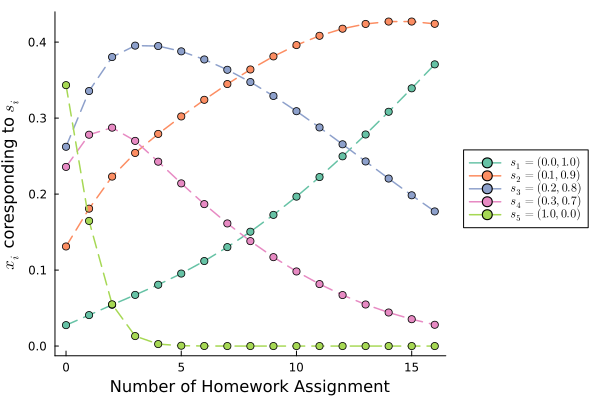

In [3]:
plot(fig)

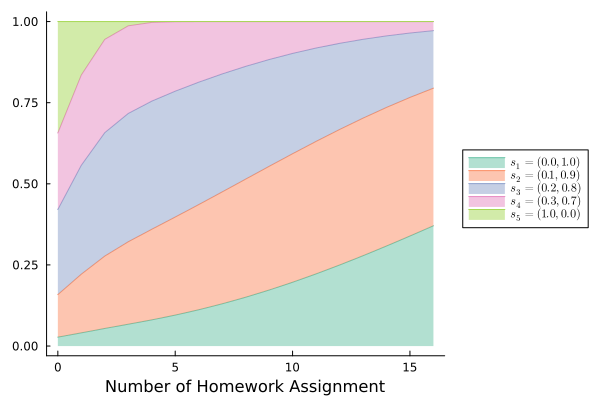

In [4]:
plot(fig2)

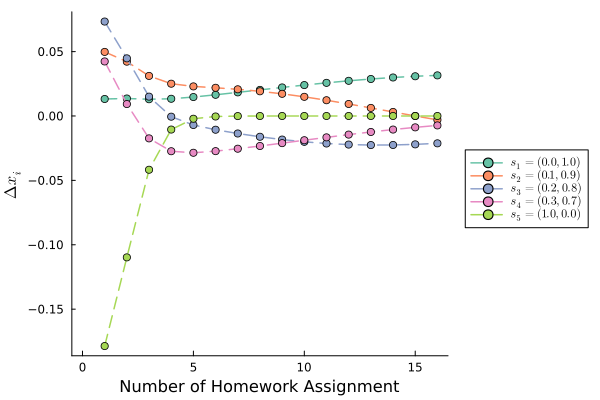

In [5]:
plot(fig3)